In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatch
%matplotlib inline

In [2]:
city_data_to_read = "resources/city_data.csv"
ride_data_to_read = "resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_read)
ride_data_df = pd.read_csv(ride_data_to_read)

In [4]:
city_ride_merged_df = ride_data_df.merge(city_data_df, left_on='city', right_on='city')
city_ride_merged_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2019-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2019-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2019-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2019-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2019-03-24 16:27:49,14.94,1670908453476,5,Urban


In [5]:
city_ride_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [6]:
city_ride_merged_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [7]:
city_ride_merged_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [25]:
urban_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Urban"]
suburban_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Suburban"]
rural_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Rural"]
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural
2255,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2256,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural
2257,North Holly,2019-01-04 03:31:26,24.88,4195619112933,8,Rural
2258,North Holly,2019-04-21 21:14:22,18.54,6259094156900,8,Rural
2259,North Holly,2019-03-28 00:12:09,35.45,3262489198068,8,Rural


In [30]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [31]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [33]:
rural_ride_count = rural_cities_df.groupby(['city']).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [35]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [39]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [42]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [43]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [44]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [45]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

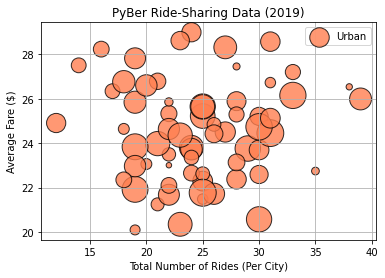

In [57]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor ='black', linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

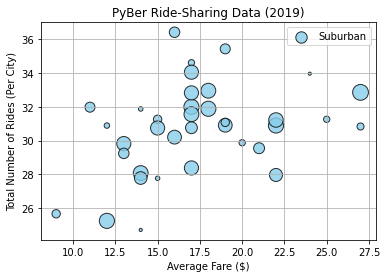

In [62]:
plt.scatter(suburban_ride_count, suburban_avg_fare, c='skyblue', s=10*suburban_driver_count, edgecolor='black', linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

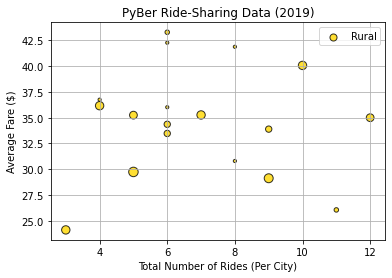

In [65]:
plt.scatter(rural_ride_count, rural_avg_fare, c='gold', s=10*rural_driver_count, edgecolor='black', linewidths=1, alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

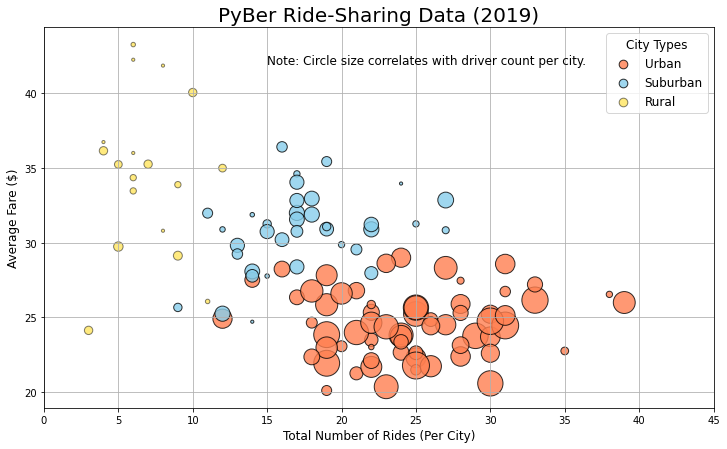

In [95]:
plt.subplots(figsize=(12, 7))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.5, label="Rural")

# Incorporate the other graph properties
plt.xlim(0,45)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(15, 42, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Show the plot
#plt.plot()
plt.savefig("analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>